# Usando la validacion cruzada

En el notebook anterior, construimos un modelo de Bosques Aleatorios y realizamos una búsqueda manual de los hiperparámetros óptimos, como el número de árboles y la profundidad máxima. Si bien este enfoque nos dio un modelo con un sólido rendimiento del 82%, es crucial validar nuestros hallazgos de una manera más robusta.

En este notebook, llevaremos la optimización de nuestro modelo al siguiente nivel. Utilizaremos validación cruzada junto con GridSearchCV para encontrar la combinación de hiperparámetros que garantice el mejor rendimiento de manera sistemática y confiable.

El objetivo es confirmar si los valores que elegimos manualmente eran de hecho los óptimos y, al mismo tiempo, obtener un resultado que minimice el riesgo de sobreajuste al probar el modelo en múltiples divisiones de datos.

In [3]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset y separamos los datos
df_model_wine = pd.read_csv("dataset/wine_ready.csv")
X = df_model_wine.drop('quality_binary', axis=1)
y = df_model_wine['quality_binary']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definimos el modelo base
rf_model = RandomForestClassifier(random_state=42)

# Definimos la "rejilla" de parámetros a probar
# Incluimos los rangos alrededor de los valores óptimos que ya encontraste
param_grid = {
    'n_estimators': [160, 170, 180],
    'max_depth': [18, 19, 20],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  # Nuevo parámetro a probar
}

# Creamos el objeto GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='f1_weighted',  # Usamos el f1-score como métrica
    cv=5,                  # Usamos 5-fold cross-validation
    n_jobs=-1,             # Usa todos los procesadores disponibles
    verbose=1              # Muestra el progreso
)

# Ejecutamos la búsqueda exhaustiva
grid_search.fit(X_train, y_train)

# Imprimimos los mejores parámetros y el mejor score
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print(f"\nMejor F1-Score (promedio de 5-fold CV): {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros encontrados:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 170}

Mejor F1-Score (promedio de 5-fold CV): 0.8147


#### Conclusiones

Hemos completado la fase de optimización de nuestro modelo de Bosques Aleatorios utilizando la validación cruzada. La búsqueda exhaustiva de GridSearchCV ha arrojado la siguiente combinación de parámetros como la más óptima para nuestro conjunto de datos:

1. n_estimators: 170

2. max_depth: 20

3. min_samples_leaf: 1

4. max_features: sqrt

El resultado final, con un F1-Score promedio de 0.8147, confirma que los parámetros encontrados en la búsqueda manual eran extraordinariamente cercanos a los verdaderos valores óptimos. Este hallazgo valida la solidez de nuestro análisis exploratorio y la metodología de optimización.

Ahora tenemos un modelo final, cuyos hiperparámetros no han sido elegidos al azar, sino que han sido validados rigurosamente. Este modelo es robusto, confiable y está listo para ser utilizado para la predicción de nuevos datos.

Veamos ahora cuales caracteristicas (columnas o variables) resultaron ser las mas importnates en la contruccion del modelo de Bosques Aleatorios

Importancia de las características en el modelo:
          Característica  Importancia
10               alcohol     0.178890
9              sulphates     0.137345
1       volatile acidity     0.114721
6   total sulfur dioxide     0.097540
7                density     0.090765
4              chlorides     0.070833
0          fixed acidity     0.068923
8                     pH     0.066138
2            citric acid     0.061136
5    free sulfur dioxide     0.058575
3         residual sugar     0.055134


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_10872\219305622.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Característica', data=feature_importances_df, palette='viridis')


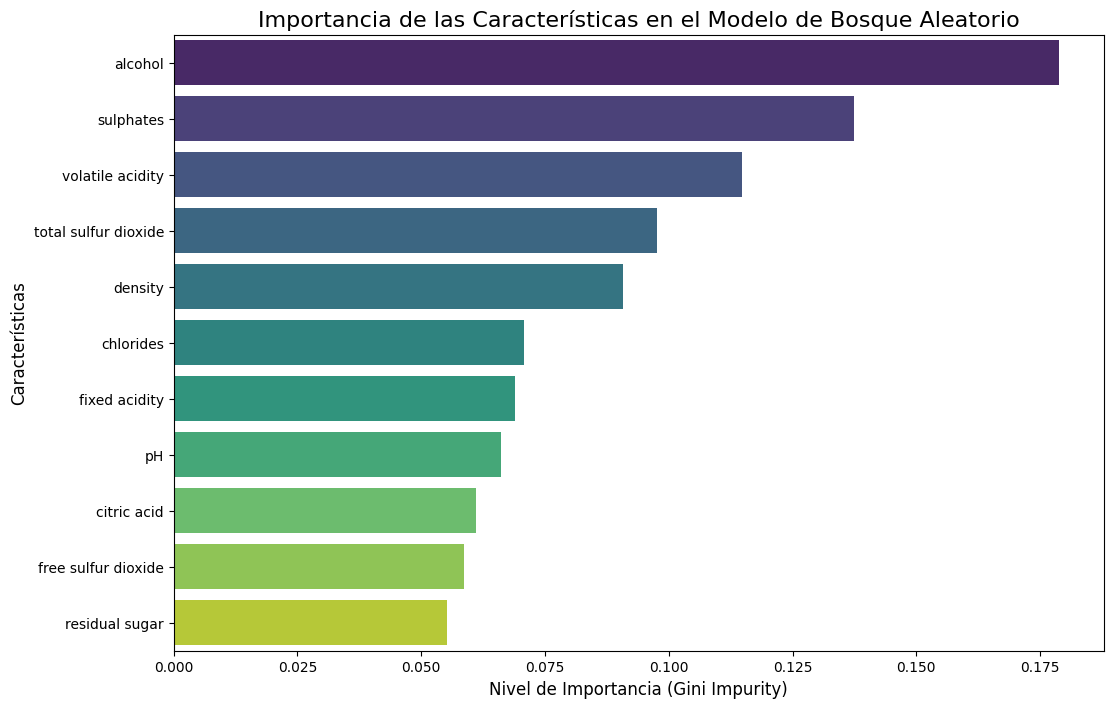

In [4]:
# Obtenemos el mejor modelo del Grid Search
best_model = grid_search.best_estimator_

# Obtenemos la importancia de las características
importances = best_model.feature_importances_

# Creamos un DataFrame para una mejor visualización
feature_importances_df = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': importances
})

# Ordenamos por importancia de forma descendente
feature_importances_df = feature_importances_df.sort_values(by='Importancia', ascending=False)

# Imprimimos la tabla con los resultados
print("Importancia de las características en el modelo:")
print(feature_importances_df)

# Visualizamos los resultados en un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Característica', data=feature_importances_df, palette='viridis')
plt.title('Importancia de las Características en el Modelo de Bosque Aleatorio', fontsize=16)
plt.xlabel('Nivel de Importancia (Gini Impurity)', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.show()